# MOwNiT 
## Laboratorium
### Znajdowanie pierwiastków

Do poszukiwania pierwiastków funkcji w Julii używamy pakietu Roots

```julia
Pkg.add("Roots")
Pkg.add("ForwardDiff")
```

In [1]:
using Pkg
#Pkg.add("Roots")
#Pkg.add("ForwardDiff")
using Roots  
using Plots
using ForwardDiff

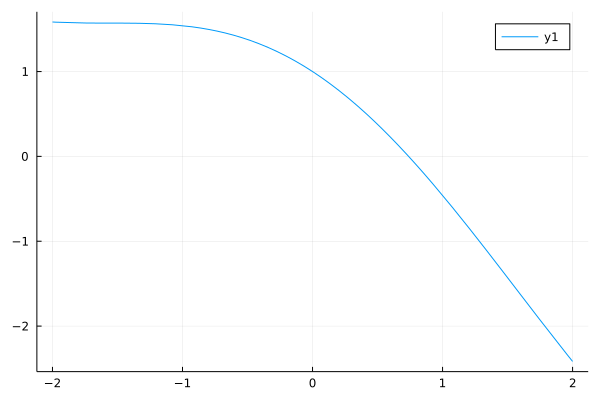

In [2]:
# przykładowa funkcja do testów
f(x) = cos(x) - x
plot(f, -2, 2)

Funkcja <i> find_zero</i>  dobiera odpowiedni algorytm w zależności od sposobu wywołania.


### 1. Metody wykorzytujące  przedział i zmianę znaku

#### 1.1 Metoda bisekcji - jesli wywołamy fzero z podaniem  przedziału (tutaj (0,1))

In [3]:
x = find_zero(f, (0, 1),verbose=true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Bisection()
* iterations: 60
* function evaluations ≈ 63
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 1.118751109680031e-154, 1 )
(a₁, b₁) = ( 1.0795210693868056e-77, 1 )
(a₂, b₂) = ( 3.3060778616876836e-39, 1 )
(a₃, b₃) = ( 5.7598240413292423e-20, 1 )
(a₄, b₄) = ( 2.4010660126805305e-10, 1 )
(a₅, b₅) = ( 1.5497207641601562e-05, 1 )
(a₆, b₆) = ( 0.003936767578125, 1 )
(a₇, b₇) = ( 0.062744140625, 1 )
(a₈, b₈) = ( 0.25048828125, 1 )
(a₉, b₉) = ( 0.50048828125, 1 )
(a₁₀, b₁₀) = ( 0.50048828125, 0.750244140625 )
(a₁₁, b₁₁) = ( 0.6253662109375, 0.750244140625 )
(a₁₂, b₁₂) = ( 0.68780517578125, 0.750244140625 )
(a₁₃, b₁₃) = ( 0.719024658203125, 0.750244140625 )
(a₁₄, b₁₄) = ( 0.7346343994140625, 0.750244140625 )
(a₁₅, b₁₅) = ( 0.7346343994140625, 0.74243927001953125 )
(a₁₆, b₁₆) = ( 0.73853683471679688, 0.74243927001953125 )
(a₁₇, b₁₇) = ( 0.73853683471679688, 0.74048805236816406 )
(a₁₈, b₁₈) = ( 0.73853683

0.7390851332151607

In [4]:
# mozna wyspecyfikowac wprost
x = find_zero(f, (0, 1), Bisection(),verbose=true)  

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Bisection()
* iterations: 60
* function evaluations ≈ 63
* stopped as f(x_n) = 0

Trace:
(a₀, b₀) = ( 1.118751109680031e-154, 1 )
(a₁, b₁) = ( 1.0795210693868056e-77, 1 )
(a₂, b₂) = ( 3.3060778616876836e-39, 1 )
(a₃, b₃) = ( 5.7598240413292423e-20, 1 )
(a₄, b₄) = ( 2.4010660126805305e-10, 1 )
(a₅, b₅) = ( 1.5497207641601562e-05, 1 )
(a₆, b₆) = ( 0.003936767578125, 1 )
(a₇, b₇) = ( 0.062744140625, 1 )
(a₈, b₈) = ( 0.25048828125, 1 )
(a₉, b₉) = ( 0.50048828125, 1 )
(a₁₀, b₁₀) = ( 0.50048828125, 0.750244140625 )
(a₁₁, b₁₁) = ( 0.6253662109375, 0.750244140625 )
(a₁₂, b₁₂) = ( 0.68780517578125, 0.750244140625 )
(a₁₃, b₁₃) = ( 0.719024658203125, 0.750244140625 )
(a₁₄, b₁₄) = ( 0.7346343994140625, 0.750244140625 )
(a₁₅, b₁₅) = ( 0.7346343994140625, 0.74243927001953125 )
(a₁₆, b₁₆) = ( 0.73853683471679688, 0.74243927001953125 )
(a₁₇, b₁₇) = ( 0.73853683471679688, 0.74048805236816406 )
(a₁₈, b₁₈) = ( 0.73853683

0.7390851332151607

#### Sprawdzanie, czy znaleźliśmy 0

In [5]:
#Sprawdzamy czy znaleźliśmy 0
iszero(f(x))

true

In [6]:
# można też sprawdzić, czy funkcja zmienia znak dla lewego i prawego sąsiada miejsca zerowego.
sign(f(prevfloat(x))) *sign(f(nextfloat(x))) 

-1.0

In [7]:
# czasem algorytm znajduje najlepsze przybliżenie 0
g(x) = sin(x)
x = find_zero(g, (pi/2, 3pi/2))
x, g(x)

(3.141592653589793, 1.2246467991473532e-16)

In [8]:
# nie jest to dokładnie 0, ale ...
iszero(g(x))

false

In [9]:
#... najbliższy lewy albo prawy sąsiad leży po przeciwnej stronie osi x  niż nasze 0.
g(prevfloat(x)) * g(x) < 0.0 || g(x) * g(nextfloat(x)) < 0.0

true

#### 1.2 Metoda regula falsi

In [10]:
find_zero(f, (0, 1), FalsePosition(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{:anderson_bjork}()
* iterations: 6
* function evaluations ≈ 8
* stopped as f(x_n) = 0

Trace:
x₁ = 1.118751109680031e-154,	 fx₁ = 1
x₂ = 1,	 fx₂ = -0.45969769413186023
x₃ = 0.68507335732604513,	 fx₃ = 0.089299276481859979
x₄ = 0.73629899761365403,	 fx₄ = 0.0046600390381426049
x₅ = 0.7390895164441823,	 fx₅ = -7.3358319172545094e-06
x₆ = 0.73908513051468816,	 fx₆ = 4.5195431841449363e-09
x₇ = 0.73908513321515801,	 fx₇ = 4.4408920985006262e-15
x₈ = 0.73908513321516067,	 fx₈ = 0



0.7390851332151607

In [11]:
# do dyspozycji mamy  12 wersji algorytmu regula falsi
find_zero(f, (0, 1), FalsePosition(12), verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: FalsePosition{12}()
* iterations: 6
* function evaluations ≈ 8
* stopped as f(x_n) = 0

Trace:
x₁ = 1.118751109680031e-154,	 fx₁ = 1
x₂ = 1,	 fx₂ = -0.45969769413186023
x₃ = 0.68507335732604513,	 fx₃ = 0.089299276481859979
x₄ = 0.73629899761365403,	 fx₄ = 0.0046600390381426049
x₅ = 0.7390895164441823,	 fx₅ = -7.3358319172545094e-06
x₆ = 0.73908513051468816,	 fx₆ = 4.5195431841449363e-09
x₇ = 0.73908513321515801,	 fx₇ = 4.4408920985006262e-15
x₈ = 0.73908513321516067,	 fx₈ = 0



0.7390851332151607

### 2. Metody korzystające z pochodnych

#### 2.1 Metoda Newtona, potrzebuje punktu startowego i wykorzystuje pochodną funkcji.

Aby użyć Metody Newtona, można skorzystać z pakietu ForwardDiff, aby obliczyć pochodną funkcji. 

In [12]:
# definujemy D(f) obliczającą  funkcje pochodną 
D(f) = x->ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

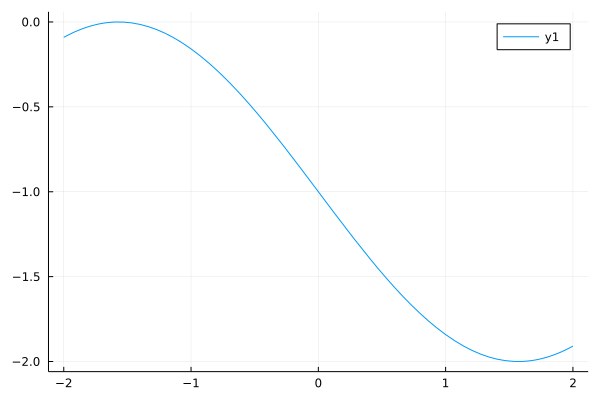

In [13]:
plot(D(f), -2,2)

In [14]:
#wywolanie metody Newtona
find_zero((f, D(f)),0, Roots.Newton(),verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Roots.Newton()
* iterations: 5
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 0,	 fx₁ = 1
x₂ = 1,	 fx₂ = -0.45969769413186023
x₃ = 0.75036386784024389,	 fx₃ = -0.018923073822117442
x₄ = 0.73911289091136168,	 fx₄ = -4.6455898990771516e-05
x₅ = 0.73908513338528403,	 fx₅ = -2.8472058044570758e-10
x₆ = 0.73908513321516067,	 fx₆ = 0



0.7390851332151607

#### 2.2 Metoda Halleya (potrzebuje pierwszej i drugiej pochodnej)

In [15]:
DD(f) = x->ForwardDiff.derivative(D(f), float(x))
find_zero((f, D(f), DD(f)), 0.0, Roots.Halley(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151606
* Algorithm: Roots.Halley()
* iterations: 4
* function evaluations ≈ 15
* stopped as |f(x_n)| ≤ max(δ, |x|⋅ϵ) using δ = atol, ϵ = rtol

Trace:
x₁ = 0,	 fx₁ = 1
x₂ = 0.66666666666666663,	 fx₂ = 0.11922059411028141
x₃ = 0.73903926244631024,	 fx₃ = 7.6769092960393692e-05
x₄ = 0.73908513321514946,	 fx₄ = 1.865174681370263e-14
x₅ = 0.73908513321516056,	 fx₅ = 1.1102230246251565e-16



0.7390851332151606

### 3. Metody korzystające z przybliżenia pochodnej

#### 3.1 Domyślna metoda bazuje na metodzie z <a href="http://www.hpl.hp.com/hpjournal/pdfs/IssuePDFs/1979-12.pdf"> kalkulatorów HP-34</a> , używa metody siecznych
oraz metody bazującej na przedziale wg artykułu:

<a href="http://na.math.kit.edu/alefeld/download/1995_Algorithm_748_Enclosing_Zeros_of_Continuous_Functions.pdf">G. E. Alefeld, F. A. Potra, and
Y. Shi, "Algorithm 748: enclosing zeros of continuous functions," ACM
Trans. Math. Softw. 21, 327–344 (1995), DOI: 10.1145/210089.210111. </a>

In [16]:
x = find_zero(f, 0,   verbose=true)

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Secant(); finished with bracketing method AlefeldPotraShi()
* iterations: 4
* function evaluations ≈ 10
* stopped as f(x_n) = 0
* Note: Used bracketing method AlefeldPotraShi() on  [0.0,0.9999969722835389]

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
(a₃, b₃) = ( 0, 0.9999969722835389 )
(a₄, b₄) = ( 1.1187488515059306e-154, 0.9999969722835389 )
(a₅, b₅) = ( 0.73848198557107825, 0.73967384145392068 )
(a₆, b₆) = ( 0.73848198557107825, 0.73908513321516067 )



0.7390851332151607

Metody find_zero dla wyzszych rzędów to wariacje metody Newtona, które nie korzystaja z pochodnej, ale ja przyblizają.


#### 3.2 Metoda siecznych

In [17]:
# wywołanie find_zero używając punktu startowego (a nie przedziału) 
# oraz opcji order=1   wykorzystuje metodę siecznych  
x = find_zero(f, 0, Order1(),  verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Secant()
* iterations: 7
* function evaluations ≈ 9
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
x₄ = 0.68507389982090516,	 fx₄ = 0.089298390734211308
x₅ = 0.73629905416077657,	 fx₅ = 0.0046599445167858633
x₆ = 0.7391193608624661,	 fx₆ = -5.7284235187471388e-05
x₇ = 0.73908511212853889,	 fx₇ = 3.5290823707789798e-08
x₈ = 0.73908513321500136,	 fx₈ = 2.6656454821250009e-13
x₉ = 0.73908513321516067,	 fx₉ = 0



0.7390851332151607

In [18]:
# metoda siecznych może być wywołana bezpośrednio 
# implementacja taka sama jak find_zero(f, 0, Order1()), ale bez
# narzutów frameworku oraz mniejsza ilość sprawdzanych warunków zbieżności - szybsza
Roots.secant_method(f, 0)

0.7390851332151607

In [19]:
# mozemy podać przedział
Roots.secant_method(f, (0,1))

0.7390851332151607

#### 3.3 Metoda Steffensena 
przybliża pochodną poprzez  (f(x + f(x)) - f(x))/f(x)  
aby ja wywołać podajemy punkt startowy oraz order 2

In [20]:
x = find_zero(f, 0, Order2(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order2()
* iterations: 6
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
x₄ = 0.68507389982090516,	 fx₄ = 0.089298390734211308
x₅ = 0.73629905416077657,	 fx₅ = 0.0046599445167858633
x₆ = 0.7391193608624661,	 fx₆ = -5.7284235187471388e-05
x₇ = 0.73908513304090806,	 fx₇ = 2.9163127468478933e-10
x₈ = 0.73908513321516067,	 fx₈ = 0



0.7390851332151607

In [21]:
# mozliwe sa jeszcze rzędy 5, 8 i 16
x = find_zero(f, 0, Order8(), verbose=true) 

Results of univariate zero finding:

* Converged to: 0.7390851332151607
* Algorithm: Order8()
* iterations: 5
* function evaluations ≈ 10
* stopped as f(x_n) = 0

Trace:
x₁ = 6.0554544523933395e-06,	 fx₁ = 0.99999394452721335
x₂ = 0,	 fx₂ = 1
x₃ = 0.9999969722835389,	 fx₃ = -0.4596921186823234
x₄ = 0.68507389982090516,	 fx₄ = 0.089298390734211308
x₅ = 0.73629905416077657,	 fx₅ = 0.0046599445167858633
x₆ = 0.7391193608624661,	 fx₆ = -5.7284235187471388e-05
x₇ = 0.73908513321516067,	 fx₇ = 0



0.7390851332151607

Można użyć funkcji fzero do znajdowania nieciagłości

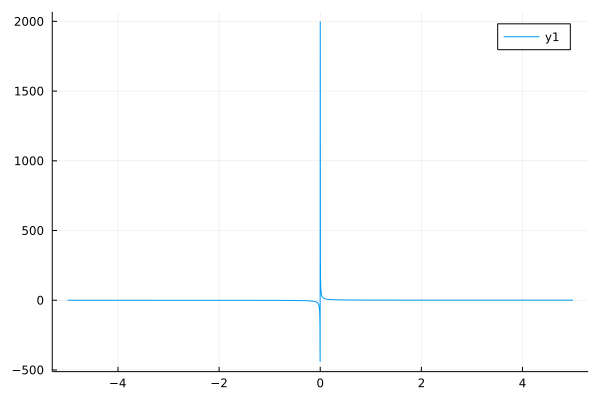

In [22]:
plot(x -> 1/x)

In [23]:
find_zero(x -> 1/x, (-1, 1), verbose=true)

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Bisection()
* iterations: 61
* function evaluations ≈ 64
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol

Trace:
(a₀, b₀) = ( -1, 0 )
(a₁, b₁) = ( -1.118751109680031e-154, 0 )
(a₂, b₂) = ( -1.1272010346794983e-231, 0 )
(a₃, b₃) = ( -3.5491565585003241e-270, 0 )
(a₄, b₄) = ( -1.988135013128901e-289, 0 )
(a₅, b₅) = ( -4.7036486372562232e-299, 0 )
(a₆, b₆) = ( -7.2341601287786131e-304, 0 )
(a₇, b₇) = ( -2.8369691695966818e-306, 0 )
(a₈, b₈) = ( -1.7765824089018436e-307, 0 )
(a₉, b₉) = ( -4.4458018696345059e-308, 0 )
(a₁₀, b₁₀) = ( -2.2229009348172529e-308, 0 )
(a₁₁, b₁₁) = ( -1.1114504674086265e-308, 0 )
(a₁₂, b₁₂) = ( -5.5572523370431324e-309, 0 )
(a₁₃, b₁₃) = ( -2.7786261685215662e-309, 0 )
(a₁₄, b₁₄) = ( -1.3893130842607831e-309, 0 )
(a₁₅, b₁₅) = ( -6.9465654213039155e-310, 0 )
(a₁₆, b₁₆) = ( -3.4732827106519577e-310, 0 )
(a₁₇, b₁₇) = ( -1.7366413553259789e-310, 0 )
(a₁₈, b₁₈) = ( -8.6832067766298943e-311, 0 

0.0

find_zeros - szukanie więcej niż jednego pierwiastka. Wykorzystuje podział przedziału na mniejsze podprzedziały

In [24]:
find_zeros(x ->(x-3)*x, -10, 10)

2-element Vector{Float64}:
 0.0
 3.0

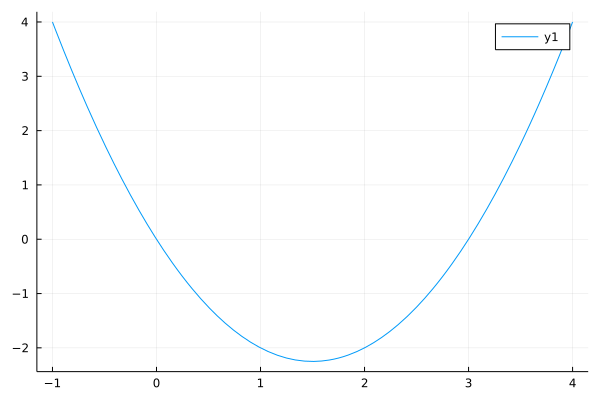

In [25]:
plot(x ->(x-3)*x,-1,4)

Więcej na https://docs.juliahub.com/Roots/o0Xsi/2.0.0/roots/

Wyciąganie informacji z przebiegu działania funkcji: https://docs.juliahub.com/Roots/o0Xsi/2.0.0/reference/#Tracking-iterations

### Zadanie:

A. Wybrać trzy metody poszukiwania pierwiastków: 

* wykorzystującą przedział i zmianę znaku, 
* wykorzystującą pochodną, 
* wykorzystującą przybliżenie pochodnej

    1. Każdą z trzech wybranych metod przetestować (ilość iteracji, ilość wywołań funkcji) na sześciu wybranych  funkcjach ze zbioru http://people.sc.fsu.edu/~jburkardt/py_src/test_zero/test_zero.html Wyniki przedstawić w formie tabelki. <b>Pamiętać o sprawdzeniu czy wynik jest poprawny poprzez obliczenie wartości funkcji dla znalezionego pierwiastka !</b> (3 pkt)

    2. Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej. (1 pkt)

    3. Dla każdej z wybranych metod zademonstrować i wyjaśnić po jednym  przykładzie, dla którego nie działają (można na podstawie p.1 lub wymyślić własny)(1 pkt)

B. Narysować <a href="https://pl.wikipedia.org/wiki/Wst%C4%99ga_Newtona"> wstegę Newtona </a> i objaśnić, w jaki sposób powstała i jaki jest jej związek z metodą Newtona do znajdowania pierwiastków. Sposób i język - dowolny. (1 pkt)

### Wykorzystywane pakiety:

In [26]:
using Roots  
using Plots
using ForwardDiff
using Printf
using DataFrames

### Wybrane metody do przetestowania:

- Metoda wykorzystująca przedział i zmianę znaku - **metoda bisekcji**
- Metoda wykorzystująca pochodną                 - **metoda Newtona-Raphsona**
- Metoda wykorzystująca przybliżenie pochodnej   - **metoda Steffensena**

### Funkcje na których będę testować metody poszukiwania pierwiastków:

1. $f(x) = sin ( x ) - x / 2.$
2. $f(x) = 2 * x - exp ( - x ).$
3. $f(x) = x * exp ( - x ).$
4. $f(x) = x^3$
5. $f(x) = ( x + 3 ) * ( x - 1 )^2.$
6. $f(x) = cos(x) - x$
<!-- 6. $f(x) = ( 16.0 - x ^ 4 ) / ( 16.0 * x ^ 4 + 0.00001 )$ Pinhead -->

### Przygotowanie danych

In [27]:
functions = [
    x -> sin(x) - x / 2,
    x -> 2 * x - exp(-x),
    x -> x * exp(-x),
    x -> x^3,
    x -> (x + 3) * (x - 1)^2,
    x -> cos(x) - x
];

f_interval = [
    (1, 3),
    (-0.5, 0.5),
    (-1, 1),
    (-1, 1),
    (-4, 4),
    (-1, 1)
];

df = [x -> ForwardDiff.derivative(f, float(x)) for f in functions];

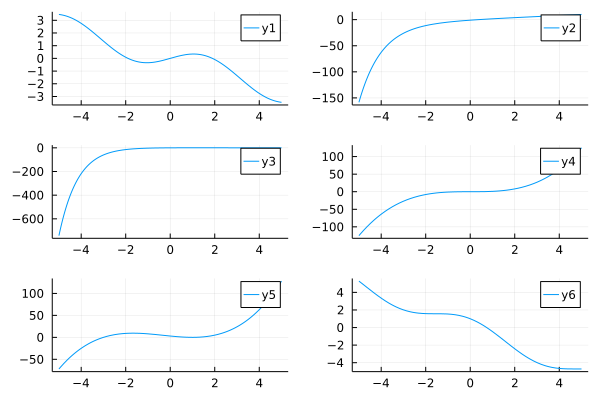

In [28]:
plot_all = plot(functions, layout=(3,2))

### Sprawdzenie czy znaleźliśmy zero

In [29]:
function verify_zero(f, x)
    sign(f(prevfloat(x))) * sign(f(nextfloat(x))) == -1 || iszero(f(x))
end

verify_zero (generic function with 1 method)

### Podpunkt 1:

**Metoda bisekcji:**

In [30]:
B = Array{Float64}(undef, 0)
B_zero = Array{Bool}(undef, 0)
B_iterations = Array{Int}(undef, 0)
B_calls = Array{Int}(undef, 0)

@printf("Arrays for bisection results initialized")

Arrays for bisection results initialized

In [31]:
tracker = Roots.Tracks()

for i in 1:6
    # Bisection
    res_i = find_zero(functions[i], f_interval[i], Bisection(), tracks=tracker)
    append!(B, res_i)
    append!(B_iterations, tracker.steps)
    append!(B_calls, tracker.fncalls)
end

@printf("Bisection:\n")
for i in 1:6
    @printf("f no. %s:\tf(x_0): %s\t%s\n", i, functions[i](B[i]), B[i])
end

Bisection:
f no. 1:	f(x_0): 0.0	1.895494267033981
f no. 2:	f(x_0): 0.0	0.35173371124919584
f no. 3:	f(x_0): 0.0	0.0
f no. 4:	f(x_0): 0.0	0.0
f no. 5:	f(x_0): 0.0	-3.0
f no. 6:	f(x_0): 0.0	0.7390851332151607


**Sprawdzenie poprawności otrzymanego wyniku:**

In [32]:
for i in 1:6
    result = verify_zero(functions[i], B[i])    
    append!(B_zero, result)
end

In [33]:
data_frame = DataFrame(
    x_values = B,
    is_zero = B_zero,
    bisection_it = B_iterations,
    bisection_fev = B_calls
)

,x_values,is_zero,bisection_it,bisection_fev
,Float64,Bool,Int64,Int64
1,1.89549,1,51,54
2,0.351734,1,112,118
3,0.0,1,112,121
4,0.0,1,112,124
5,-3.0,1,173,188
6,0.739085,1,234,252


**Metoda Newtona-Raphsona:**

In [34]:
NR = Array{Float64}(undef, 0)
NR_zero = Array{Bool}(undef, 0)
NR_iterations = Array{Int}(undef, 0)
NR_calls = Array{Int}(undef, 0)

tracker = Roots.Tracks()

for i in 1:6
    # Newton-Raphson    
    res_i = find_zero((functions[i], df[i]), f_interval[i][1], Roots.Newton(), tracks=tracker)
    append!(NR, res_i)
    append!(NR_zero, verify_zero(functions[i], NR[i]))
    append!(NR_iterations, tracker.steps)
    append!(NR_calls, tracker.fncalls)
end

@printf("Newton-Raphson:\n")
for i in 1:6
    @printf("f no. %s:\tf(x_0): %s\t\t\t%s\n", i, functions[i](NR[i]), NR[i])
end

Newton-Raphson:
f no. 1:	f(x_0): 0.0			1.895494267033981
f no. 2:	f(x_0): 0.0			0.35173371124919584
f no. 3:	f(x_0): -8.80999858950826e-27			-8.80999858950826e-27
f no. 4:	f(x_0): -4.786967314877968e-16			-7.822642576269843e-6
f no. 5:	f(x_0): 0.0			-3.0
f no. 6:	f(x_0): 0.0			0.7390851332151607


In [35]:
data_frame = DataFrame(
    x_values = NR,
    is_zero = NR_zero,
    bisection_it = NR_iterations,
    bisection_fev = NR_calls
)

,x_values,is_zero,bisection_it,bisection_fev
,Float64,Bool,Int64,Int64
1,1.89549,1,14,28
2,0.351734,1,19,38
3,-8.81e-27,0,26,52
4,-7.82264e-6,0,55,110
5,-3.0,1,61,122
6,0.739085,1,69,138


**Metoda Steffensena:**

In [36]:
S = Array{Float64}(undef, 0)
S_zero = Array{Bool}(undef, 0)
S_iterations = Array{Int}(undef, 0)
S_calls = Array{Int}(undef, 0)

tracker = Roots.Tracks()

for i in 1:6
    # Steffensen   
    res_i = find_zero(functions[i], f_interval[i][1], Order2(), tracks=tracker)
    append!(S, res_i)
    append!(S_zero, verify_zero(functions[i], S[i]))
    append!(S_iterations, tracker.steps)
    append!(S_calls, tracker.fncalls)
end

@printf("Steffensen:\n")
for i in 1:6
    @printf("f no. %s:\tf(x_0): %s\t\t\t%s\n", i, functions[i](S[i]), S[i])
end

Steffensen:
f no. 1:	f(x_0): -2.220446049250313e-16			1.8954942670339812
f no. 2:	f(x_0): 2.220446049250313e-16			0.3517337112491959
f no. 3:	f(x_0): 0.0			0.0
f no. 4:	f(x_0): -6.134154522433141e-16			-8.496725161716299e-6
f no. 5:	f(x_0): 0.0			-3.0
f no. 6:	f(x_0): 0.0			0.7390851332151607


In [37]:
data_frame = DataFrame(
    x_values = S,
    is_zero = S_zero,
    bisection_it = S_iterations,
    bisection_fev = S_calls
)

,x_values,is_zero,bisection_it,bisection_fev
,Float64,Bool,Int64,Int64
1,1.89549,0,9,13
2,0.351734,0,14,22
3,0.0,1,22,34
4,-8.49673e-6,0,53,90
5,-3.0,1,60,101
6,0.739085,1,67,112


- Order1 nie działa dla f2, f3, f4.
- Order2 nie działa dla f1, f2, f4.
- Order5 nie działa dla f3, f4, f6.
- Order8 nie działa dla f3, f4.
- Order16 nie działa dla f4.

### Podpunkt 2:

**Zademonstrować wybrany, ciekawy przykład trudnej funkcji z p.1 i działania metod na niej:**

$f(x) = ( 16.0 - x ^ 4 ) / ( 16.0 * x ^ 4 + 0.00001 )$ Pinhead

In [38]:
f(x) = ( 16.0 - x ^ 4 ) / ( 16.0 * x ^ 4 + 0.00001 )

f (generic function with 1 method)

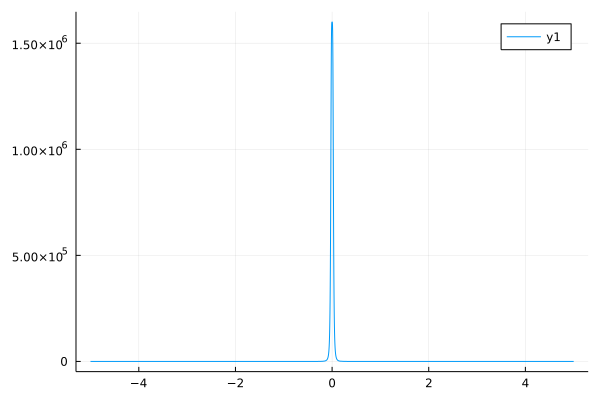

In [39]:
plot2 = plot(f)

#### Przykład 1 - bisekcja

In [40]:
tracker = Roots.Tracks()
res1 = find_zero(f, (-2.5, -1), Bisection(), verbose=true, tracks=tracker) # Działa
try
    res2 = find_zero(f, (-3, 3), Bisection(), verbose=true, tracks=tracker)
catch 
    println("Results of univariate zero finding:\n\n\tArgumentError: The interval [a,b] is not a bracketing interval.\n\tYou need f(a) and f(b) to have different signs (f(a) * f(b) < 0).")
end # Nie działa ponieważ f(a) * f(b) > 0.

Results of univariate zero finding:

* Converged to: -2.0
* Algorithm: Bisection()
* iterations: 51
* function evaluations ≈ 54
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol

Trace:
(a₀, b₀) = ( -2.5, -1.625 )
(a₁, b₁) = ( -2.5, -1.9375 )
(a₂, b₂) = ( -2.1875, -1.9375 )
(a₃, b₃) = ( -2.03125, -1.9375 )
(a₄, b₄) = ( -2.03125, -1.9765625 )
(a₅, b₅) = ( -2.03125, -1.99609375 )
(a₆, b₆) = ( -2.01171875, -1.99609375 )
(a₇, b₇) = ( -2.001953125, -1.99609375 )
(a₈, b₈) = ( -2.001953125, -1.99853515625 )
(a₉, b₉) = ( -2.001953125, -1.999755859375 )
(a₁₀, b₁₀) = ( -2.000732421875, -1.999755859375 )
(a₁₁, b₁₁) = ( -2.0001220703125, -1.999755859375 )
(a₁₂, b₁₂) = ( -2.0001220703125, -1.999908447265625 )
(a₁₃, b₁₃) = ( -2.0001220703125, -1.9999847412109375 )
(a₁₄, b₁₄) = ( -2.0000457763671875, -1.9999847412109375 )
(a₁₅, b₁₅) = ( -2.0000076293945312, -1.9999847412109375 )
(a₁₆, b₁₆) = ( -2.0000076293945312, -1.9999942779541016 )
(a₁₇, b₁₇) = ( -2.0000076293945312, -1.9999990463256836 )
(

Results of univariate zero finding:

	ArgumentError: The interval [a,b] is not a bracketing interval.
	You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).


In [41]:
@printf("%s\t%s\n", f(-2.5), f(-1))
@printf("%s\t%s", f(-3), f(3))

-0.03689999940960001	0.9374994140628662
-0.050154320600661106	-0.050154320600661106

In [42]:
D(f) = x -> ForwardDiff.derivative(f, float(x))

res3 = find_zero((f, D(f)), -3, Roots.Newton(), verbose=true)
res4 = find_zero((f, D(f)), 3, Roots.Newton(), verbose=true)

Results of univariate zero finding:

* Converged to: 2.0
* Algorithm: Roots.Newton()
* iterations: 23
* function evaluations ≈ 46
* stopped as f(x_n) = 0

Trace:
x₁ = -3,	 fx₁ = -0.050154320600661106
x₂ = 0.04687490449129017,	 fx₂ = 183387.35997246313
x₃ = 0.060110672413299246,	 fx₃ = 73094.622275080386
x₄ = 0.075857718494958579,	 fx₄ = 29640.068324947926
x₅ = 0.095180055997939939,	 fx₅ = 12092.58435823605
x₆ = 0.11915615607703881,	 fx₆ = 4945.203834683417
x₇ = 0.14903717460528904,	 fx₇ = 2024.223045545803
x₈ = 0.18634251578501954,	 fx₈ = 828.88520948194639
x₉ = 0.23294877867003597,	 fx₉ = 339.4580755678295
x₁₀ = 0.29118761115494707,	 fx₁₀ = 139.01942385786282
x₁₁ = 0.36395812646814102,	 fx₁₁ = 56.924902911372072
x₁₂ = 0.45485110415447139,	 fx₁₂ = 23.299857337700516
x₁₃ = 0.56826132675817809,	 fx₁₃ = 9.5271997568540279
x₁₄ = 0.70940160644278838,	 fx₁₄ = 3.8859830208796109
x₁₅ = 0.88394518343840556,	 fx₁₅ = 1.5754409376136638
x₁₆ = 1.0964993760596524,	 fx₁₆ = 0.62927724692988607
x₁₇ = 1

Results of univariate zero finding:

* Converged to: -2.0
* Algorithm: Roots.Newton()
* iterations: 23
* function evaluations ≈ 46
* stopped as f(x_n) = 0

Trace:
x₁ = 3,	 fx₁ = -0.050154320600661106
x₂ = -0.04687490449129017,	 fx₂ = 183387.35997246313
x₃ = -0.060110672413299246,	 fx₃ = 73094.622275080386
x₄ = -0.075857718494958579,	 fx₄ = 29640.068324947926
x₅ = -0.095180055997939939,	 fx₅ = 12092.58435823605
x₆ = -0.11915615607703881,	 fx₆ = 4945.203834683417
x₇ = -0.14903717460528904,	 fx₇ = 2024.223045545803
x₈ = -0.18634251578501954,	 fx₈ = 828.88520948194639
x₉ = -0.23294877867003597,	 fx₉ = 339.4580755678295
x₁₀ = -0.29118761115494707,	 fx₁₀ = 139.01942385786282
x₁₁ = -0.36395812646814102,	 fx₁₁ = 56.924902911372072
x₁₂ = -0.45485110415447139,	 fx₁₂ = 23.299857337700516
x₁₃ = -0.56826132675817809,	 fx₁₃ = 9.5271997568540279
x₁₄ = -0.70940160644278838,	 fx₁₄ = 3.8859830208796109
x₁₅ = -0.88394518343840556,	 fx₁₅ = 1.5754409376136638
x₁₆ = -1.0964993760596524,	 fx₁₆ = 0.6292772469

-2.0

In [43]:
@printf("%s\t%s\n", res3, res4)

2.0	-2.0


In [44]:
res5 = find_zero(f, (-2.5, -1), Order2(), verbose=true) # Działa
try
    res6 = find_zero(f, (-3, 3), Order2(), verbose=true)
catch e
    println("Convergence failed.")
end # Nie działa. Algorytm wpadł rozbieżny cykl iteracji.

Results of univariate zero finding:

* Converged to: -2.0
* Algorithm: Order2()
* iterations: 9
* function evaluations ≈ 14
* stopped as f(x_n) = 0

Trace:
x₁ = -2.5,	 fx₁ = -0.036899999409600009
x₂ = -1,	 fx₂ = 0.93749941406286619
x₃ = -2.4431957795241797,	 fx₃ = -0.034434878199385011
x₄ = -2.3920644723139879,	 fx₄ = -0.031957225527838341
x₅ = -1.7325633506215534,	 fx₅ = 0.048479686378694854
x₆ = -2.1300476247965525,	 fx₆ = -0.013921651206818151
x₇ = -2.0413694387292032,	 fx₇ = -0.004914443703395833
x₈ = -1.9929855247379173,	 fx₈ = 0.00088455157986313409
x₉ = -1.9999464285902211,	 fx₉ = 6.6968744060076749e-06
x₁₀ = -1.9999999968611613,	 fx₁₀ = 3.9235483019626685e-10
x₁₁ = -2,	 fx₁₁ = 0



Results of univariate zero finding:

* Convergence failed: Increment `Δx` has issues. 
* Algorithm Order2()

Trace:
x₁ = -3,	 fx₁ = -0.050154320600661106
x₂ = 3,	 fx₂ = -0.050154320600661106
x₃ = 3,	 fx₃ = -0.050154320600661106



Convergence failed.


### Podpunkt 3:

**Przykład gdzie nie działa metoda bisekcji:**

Ad. Omówione w Podpunkt 2 przykład 1

**Przykład gdzie nie działa metoda Newtona-Raphsona:**

Jeżeli nie będziemy uważać przy wyborze przedziału dla metody Newtona-Raphsona może się okazać, że pechowo określimy punkt startowy w ekstremum lokalnym funkcji, w którym nie ma pierwiastka.

In [53]:
f(x) = x^5 - x - 1
df_(x) = 5*x^4 - 1

D(f) = x -> ForwardDiff.derivative(f, float(x))

D (generic function with 1 method)

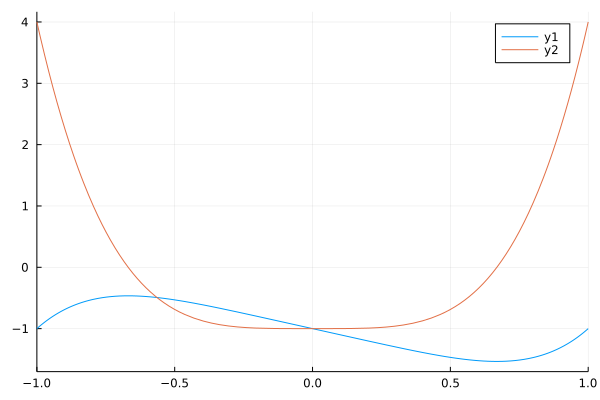

In [54]:
plot3 = plot(f, xlim=(-1, 1))
plot3 = plot!(df_, xlim=(-1, 1))

In [47]:
try
    res7 = find_zero((f, D(f)), 0, Roots.Newton(), verbose=true)
catch
    println("f'(x) = 0")
end

Results of univariate zero finding:

* Convergence failed: 
* Algorithm Roots.Newton()

Trace:
x₁ = 0,	 fx₁ = -1
x₂ = -1,	 fx₂ = -1
x₃ = -0.75,	 fx₃ = -0.4873046875
x₄ = 0.087248322147650992,	 fx₄ = -1.0872432663996423
x₅ = -1.0003100460739576,	 fx₅ = -1.0012411458795991
x₆ = -0.75038737753747997,	 fx₆ = -0.48753078673077721
x₇ = 0.082568177991163005,	 fx₇ = -1.0825643403575778
x₈ = -1.0002477999261075,	 fx₈ = -1.0009918139046436
x₉ = -0.75030963486865565,	 fx₉ = -0.48748530930405543
x₁₀ = 0.08350398765431899,	 fx₁₀ = -1.0834999275604316
x₁₁ = -1.0002594112249579,	 fx₁₁ = -1.0010383180162592
x₁₂ = -0.75032413796362074,	 fx₁₂ = -0.4874937893604816
x₁₃ = 0.083329279144628399,	 fx₁₃ = -1.0833252613463857
x₁₄ = -1.0002572128248959,	 fx₁₄ = -1.0010295130541462
x₁₅ = -0.75032139209032023,	 fx₁₅ = -0.48749218369366465
x₁₆ = 0.083362352126728823,	 fx₁₆ = -1.0833583263489324
x₁₇ = -1.0002576279030353,	 fx₁₇ = -1.0010311755045205
x₁₈ = -0.75032191053782382,	 fx₁₈ = -0.4874924868542504
x₁₉ = 0.08

f'(x) = 0


**Przykład gdzie nie działa metoda Steffensena:**

In [48]:
f(x) = x^3

f (generic function with 1 method)

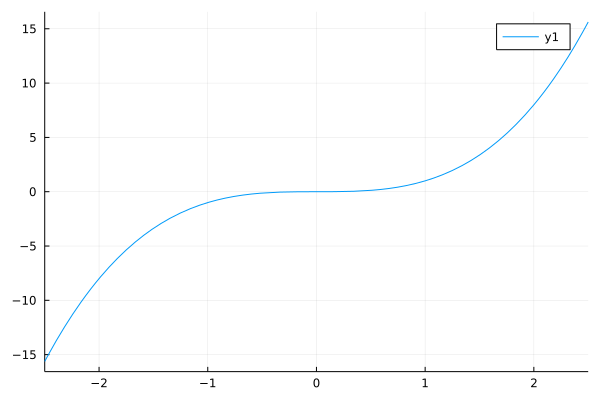

In [49]:
plot4 = plot(f, xlim=(-2.5, 2.5))

In [50]:
try
    res8 = find_zero(f, (-3, 3), Order2(), verbose=true)
catch
    println("Perhaps bad starting point or interval:((")
end

Results of univariate zero finding:

* Converged to: 0.0
* Algorithm: Order2()
* iterations: 1
* function evaluations ≈ 3
* stopped as f(x_n) = 0

Trace:
x₁ = -3,	 fx₁ = -27
x₂ = 3,	 fx₂ = 27
x₃ = 0,	 fx₃ = 0



0.0